## Problem Statement
### [Real or Fake] : Fake Job Prediction
#### This dataset contains 18K job descriptions out of which about 800 are fake. The data consists of both textual information and meta-information about the jobs. The dataset can be used to create classification models which can predict the company fraud or genuine based on company profile,descriptions and requirements.

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split,GridSearchCV

## Read the csv

In [2]:
data_set = pd.read_csv('fake_job_postings.csv')
data_set.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


### Taking useful columns only

In [3]:
df = data_set[['company_profile','description','requirements','fraudulent']]
df.tail()

,company_profile,description,requirements,fraudulent
17875,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,0
17876,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,0
17877,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,0
17878,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,0
17879,Vend is looking for some awesome new talent to...,Who are we?Vend is an award winning web based ...,We want to hear from you if:You have an in-dep...,0


### As per the data set the
#### *Independent features - company_profile, description, requirements
#### *Dependent feature - fraudulent


#### Check the null values if its exsist then we drop that rows

In [4]:
df.isna().sum()

company_profile    3308
description           1
requirements       2696
fraudulent            0
dtype: int64

In [5]:
df.dropna(inplace=True,axis = 0)

C:\Users\PURAB\AppData\Local\Temp\ipykernel_12924\1993981293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True,axis = 0)


In [8]:
df.isna().sum()

company_profile    0
description        0
requirements       0
fraudulent         0
dtype: int64

In [10]:
df['fraudulent'].value_counts()


fraudulent
0    12358
1      272
Name: count, dtype: int64

### Visualization of fraudulent column value

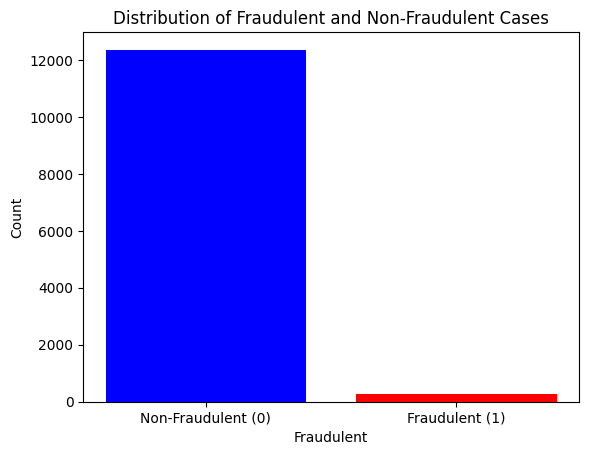

In [11]:
import matplotlib.pyplot as plt

fraud_counts = df['fraudulent'].value_counts()

# Plotting
plt.bar(fraud_counts.index, fraud_counts.values, color=['blue', 'red'])
plt.xlabel('Fraudulent')
plt.ylabel('Count')
plt.title('Distribution of Fraudulent and Non-Fraudulent Cases')
plt.xticks([0, 1], ['Non-Fraudulent (0)', 'Fraudulent (1)'])
plt.show()

#### From the visualization we can say there are the output categories are two 0 and 1

### Natural Language Processing (NLP)

#### Split data into train and test

In [12]:
from sklearn.model_selection import train_test_split


In [13]:
x_train,x_test,y_train,y_test = train_test_split(df.loc[:,'company_profile':'requirements'],df['fraudulent'],test_size=0.25, stratify=df['fraudulent'])

#### Text Preprocessing

##### Special Character Remove

In [14]:
x_train.shape,x_test.shape

((9472, 3), (3158, 3))

In [15]:
x_train['company_profile'] = x_train['company_profile'].str.replace("[^a-zA-Z0-9 ]","",regex=True)
x_test['company_profile'] =  x_test['company_profile'].str.replace("[^a-zA-Z0-9 ]","",regex=True)

x_train['description'] = x_train['description'].str.replace("[^a-zA-Z0-9 ]","",regex=True)
x_test['description'] =  x_test['description'].str.replace("[^a-zA-Z0-9 ]","",regex=True)

x_train['requirements'] = x_train['requirements'].str.replace("[^a-zA-Z0-9 ]","",regex=True)
x_test['requirements'] =  x_test['requirements'].str.replace("[^a-zA-Z0-9 ]","",regex=True)

In [16]:
x_train


,company_profile,description,requirements
3464,HealthLink provides a computer communications ...,We are currently looking for a talented indivi...,The ideal candidate will have a genuine passio...
8457,Filament Labs is building Patient IO a care p...,Do you believe our healthcare system is broken...,Skills amp Requirements we expect to see Topno...
2115,Visual BI is one of the leading and fastest gr...,Are you looking for exciting opportunities in ...,The candidate should be able to share a strong...
439,Company Website URLb0bc289d014ce1647b7dbe8ffe0...,Advisor Websites is a global leader in website...,You must have proven sales experience in a suc...
2938,Founded in 2010 by a team from Googles London ...,Qubit Cutting Edge Big Data EngineeringQubits ...,What youll needEither a degree in a technical ...
...,...,...,...
5638,Brand Apps is a exciting young company that cr...,We are currently recruiting for an Operations ...,This is a significant role within the organisa...
4262,CAKE is a marketing technology company providi...,THE COMPANYCAKE is a marketing technology comp...,QUALIFICATIONSBABS in Computer Science Enginee...
16958,LEI Home Enhancements is an Ohio based company...,LEI is an industry leader in Home Improvements...,Required Skills Candidate must be comfortable ...
11669,Our CompanyAdcash is an international advertis...,Performs technical and reporting function cont...,The candidate should be confident a selfstarte...


##### Stop words Remove

In [17]:
import nltk

In [18]:
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PURAB\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
stopword_list = stopwords.words('english')


### Applying TF-IDF

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
vectorizer_company_profile = TfidfVectorizer(stop_words= stopword_list,ngram_range= (2,2),max_features=500)
vectorizer_company_profile.fit(x_train['company_profile'])

vectorizer_description = TfidfVectorizer(stop_words= stopword_list,ngram_range= (2,2),max_features=500)
vectorizer_description.fit(x_train['description'])

vectorizer_requirements = TfidfVectorizer(stop_words= stopword_list,ngram_range= (2,2),max_features=500)
vectorizer_requirements.fit(x_train['requirements'])

TfidfVectorizer(max_features=500, ngram_range=(2, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [22]:
x_train_company_profile = vectorizer_company_profile.transform(x_train['company_profile'])
x_test_company_profile = vectorizer_company_profile.transform(x_test['company_profile'])

x_train_description = vectorizer_description.transform(x_train['description'])
x_test_description = vectorizer_description.transform(x_test['description'])

x_train_requirements = vectorizer_requirements.transform(x_train['requirements'])
x_test_requirements = vectorizer_requirements.transform(x_test['requirements'])

In [131]:
import pickle
with open("vectorizer_company_profile.pkl","wb") as f:
    pickle.dump(vectorizer_company_profile,f)

In [132]:
import pickle
with open("vectorizer_description.pkl","wb") as f:
    pickle.dump(vectorizer_description,f)

In [133]:
import pickle
with open("vectorizer_requirements.pkl","wb") as f:
    pickle.dump(vectorizer_requirements,f)

In [23]:
x_train_requirements.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
import pickle
with open("vectorizer_company_profile.pkl","wb") as f:
    pickle.dump(vectorizer_company_profile,f)

In [25]:
import pickle
with open("vectorizer_description.pkl","wb") as f:
    pickle.dump(vectorizer_description,f)

In [26]:
import pickle
with open("vectorizer_requirements.pkl","wb") as f:
    pickle.dump(vectorizer_requirements,f)

In [27]:
x_test_description

<3158x500 sparse matrix of type '<class 'numpy.float64'>'
	with 23733 stored elements in Compressed Sparse Row format>

In [28]:
x_train_final = np.hstack((x_train_company_profile.toarray(),x_train_description.toarray(),x_train_requirements.toarray()))
x_test_final = np.hstack((x_test_company_profile.toarray(),x_test_description.toarray(),x_test_requirements.toarray()))

In [29]:
x_test_final.shape

(3158, 1500)

In [30]:
x_train_final.shape

(9472, 1500)

## Now applying Machine Learning Models

### Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression()


In [32]:
from sklearn.model_selection import GridSearchCV
parameter = {'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40],'max_iter':[100,200,300]}

In [33]:
classifier_regressor=GridSearchCV(logistic_regression_model,param_grid=parameter,scoring='accuracy',cv = 5)

In [34]:
classifier_regressor.fit(x_train_final,y_train)

C:\Users\PURAB\DATA SCIENCE\project_analysis\Fake_job_prdeiction\job_predict\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
300 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\PURAB\DATA SCIENCE\project_analysis\Fake_job_prdeiction\job_predict\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\PURAB\DATA SCIENCE\project_analysis\Fake_job_prdeiction\job_predict\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
          

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [35]:
print(classifier_regressor.best_params_)

{'C': 5, 'max_iter': 100, 'penalty': 'l2'}


In [36]:
print(classifier_regressor.best_score_)

0.9894423996901758


In [37]:
logistic_regression_model = LogisticRegression(C= 5, max_iter = 100, penalty = 'l2')
logistic_regression_model.fit(x_train_final,y_train)

LogisticRegression(C=5)

In [38]:
y_predict = logistic_regression_model.predict(x_test_final)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
from sklearn.metrics import accuracy_score,classification_report

In [40]:
logistic_regression_modesl_accurecy = accuracy_score(y_predict,y_test)
logistic_regression_modesl_accurecy

0.9911336288790373

In [43]:
logistic_regression_modesl_classification_report =classification_report(y_predict,y_test)
print(logistic_regression_modesl_classification_report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3112
           1       0.63      0.93      0.75        46

    accuracy                           0.99      3158
   macro avg       0.82      0.96      0.87      3158
weighted avg       0.99      0.99      0.99      3158



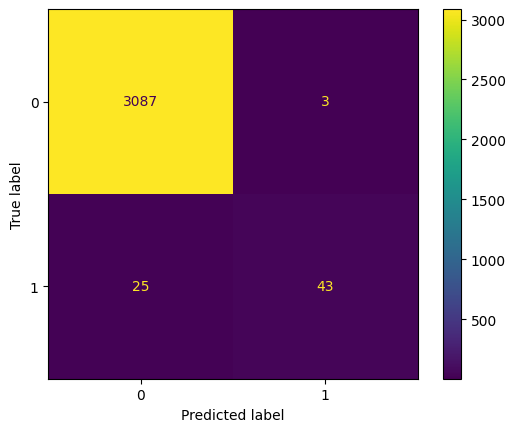

In [42]:
import sklearn.metrics
sklearn.metrics.ConfusionMatrixDisplay.from_estimator(logistic_regression_model, x_test_final, y_test)

#### Naive Bayes

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

In [45]:
naive_byas_model = MultinomialNB()

In [46]:
parameter = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
}

In [47]:
naive_classifier = GridSearchCV(naive_byas_model,param_grid=parameter,scoring='accuracy',cv = 5)

In [48]:
naive_classifier.fit(x_train_final,y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

In [49]:
print(naive_classifier.best_score_)

0.9870145132664462


In [50]:
print(naive_classifier.best_params_)

{'alpha': 0.1}


In [51]:
naive_byas_model = MultinomialNB(alpha= 0.1)
naive_byas_model.fit(x_train_final,y_train)

MultinomialNB(alpha=0.1)

In [52]:
naive_y_predict = naive_byas_model.predict(x_test_final)
naive_y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
from sklearn.metrics import accuracy_score,classification_report

In [54]:
naive_byas_model_accurecy = accuracy_score(naive_y_predict,y_test)
naive_byas_model_accurecy


0.9879670677644079

In [55]:
naive_byas_classification_report = classification_report(naive_y_predict,y_test)
print(naive_byas_classification_report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3100
           1       0.65      0.76      0.70        58

    accuracy                           0.99      3158
   macro avg       0.82      0.88      0.85      3158
weighted avg       0.99      0.99      0.99      3158



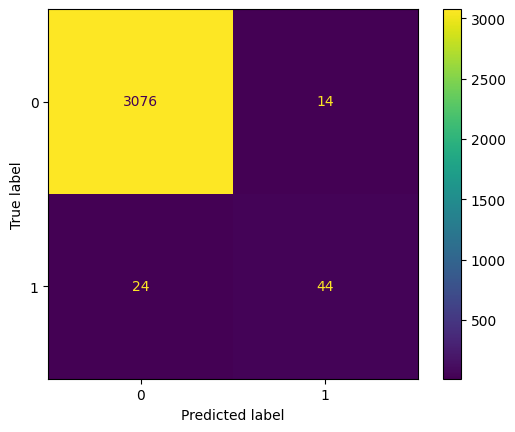

In [56]:
import sklearn.metrics
sklearn.metrics.ConfusionMatrixDisplay.from_estimator(naive_byas_model, x_test_final, y_test)

### Decision Tree

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


In [58]:
decision_tree_model = DecisionTreeClassifier(class_weight= 'balanced')

In [59]:
parameter = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
decision_classifier = GridSearchCV(decision_tree_model,param_grid = parameter ,scoring='accuracy',cv=5)

In [60]:
decision_classifier.fit(x_train_final,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [62]:
print(decision_classifier.best_score_)

0.9859582127145018


In [65]:
print(decision_classifier.best_params_)

{'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [66]:
decision_tree_model = DecisionTreeClassifier(criterion = 'entropy',max_depth = 50 ,min_samples_leaf= 1, min_samples_split= 2,class_weight= 'balanced')
decision_tree_model.fit(x_train_final,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=50)

In [67]:
decision_tree_y_predict = decision_tree_model.predict(x_test_final)

In [68]:
from sklearn.metrics import accuracy_score,classification_report
descision_tree_accurecy = accuracy_score(decision_tree_y_predict,y_test)
descision_tree_accurecy

0.9863837872070931

In [69]:
decision_tree_classification_report = classification_report(decision_tree_y_predict,y_test)
print(decision_tree_classification_report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3073
           1       0.81      0.65      0.72        85

    accuracy                           0.99      3158
   macro avg       0.90      0.82      0.86      3158
weighted avg       0.99      0.99      0.99      3158



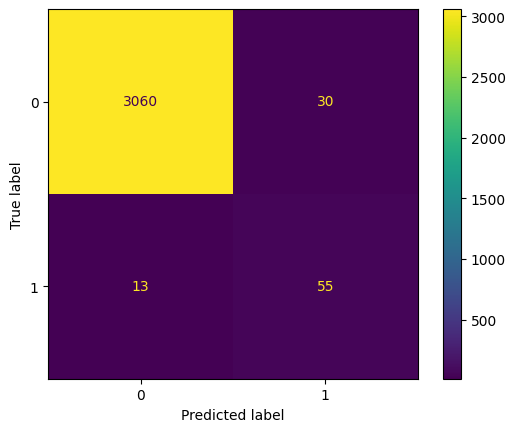

In [75]:
import sklearn.metrics
sklearn.metrics.ConfusionMatrixDisplay.from_estimator(decision_tree_model, x_test_final, y_test)

### Random Forest

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [72]:
random_forest = RandomForestClassifier(class_weight = 'balanced')
parameter = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
random_forest_cv = GridSearchCV(random_forest,param_grid = parameter,cv = 5 , scoring='accuracy')

In [73]:
random_forest_cv.fit(x_train_final,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [77]:
print(random_forest_cv.best_params_)

{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [78]:
print(random_forest_cv.best_score_)

0.9922930069404007


In [79]:
random_forest = RandomForestClassifier(max_depth = 30,min_samples_leaf = 1, min_samples_split= 5, n_estimators = 200,class_weight='balanced')
random_forest.fit(x_train_final,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=30,
                       min_samples_split=5, n_estimators=200)

In [80]:
random_forest_predict_y = random_forest.predict(x_test_final)

In [81]:
random_forest_predict_y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [82]:
from sklearn.metrics import accuracy_score,classification_report

random_forest_acc = accuracy_score(random_forest_predict_y,y_test)
random_forest_acc

0.993350221659278

In [83]:
random_forest_classification_report = classification_report(random_forest_predict_y,y_test)


In [84]:
print(random_forest_classification_report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3111
           1       0.69      1.00      0.82        47

    accuracy                           0.99      3158
   macro avg       0.85      1.00      0.91      3158
weighted avg       1.00      0.99      0.99      3158



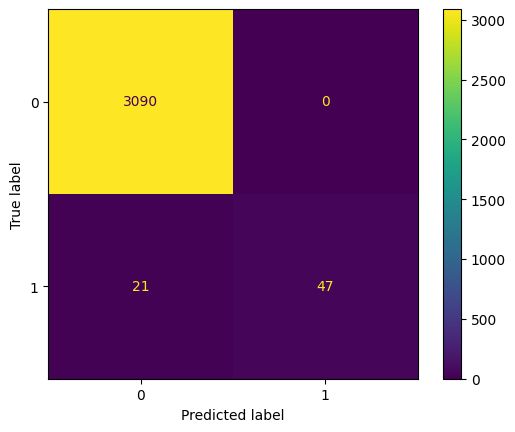

In [85]:
import sklearn.metrics
sklearn.metrics.ConfusionMatrixDisplay.from_estimator(random_forest, x_test_final, y_test)

### XGBoost 

In [89]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [90]:
xgboost_classifier = XGBClassifier()
param = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0]}

xgBoost_cv = GridSearchCV(xgboost_classifier,param_grid=param,cv = 5, scoring='accuracy')

In [91]:
xgBoost_cv.fit(x_train_final,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [92]:
print(xgBoost_cv.best_params_)


{'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 300, 'subsample': 1.0}


In [93]:
print(xgBoost_cv.best_score_)

0.9919764399729182


In [94]:
xgBoost_model = XGBClassifier(learning_rate = 0.2, max_depth = 4, n_estimators = 200, subsample = 0.8)
xgBoost_model.fit(x_train_final,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [95]:
xgboost_y_predict = xgBoost_model.predict(x_test_final)
xgboost_y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [96]:
from sklearn.metrics import accuracy_score,classification_report
xg_accurecy = accuracy_score(xgboost_y_predict,y_test)
print(xg_accurecy)

0.9914502849905004


In [97]:
xg_classification_report = classification_report(xgboost_y_predict,y_test)
print(xg_classification_report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3113
           1       0.63      0.96      0.76        45

    accuracy                           0.99      3158
   macro avg       0.82      0.97      0.88      3158
weighted avg       0.99      0.99      0.99      3158



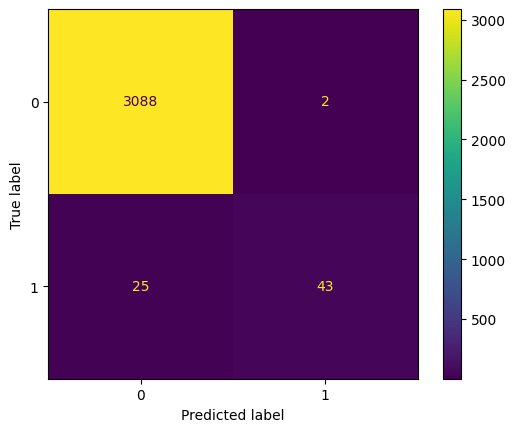

In [98]:
import sklearn.metrics
sklearn.metrics.ConfusionMatrixDisplay.from_estimator(xgBoost_model, x_test_final, y_test)

### Applying Deep Laearning

In [99]:
import tensorflow as tf

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,PReLU,ELU,LeakyReLU
from tensorflow.keras.layers import Dropout

#### Initialize ANN

In [101]:
classifier = Sequential()

In [102]:
x_train_final.shape

(9472, 1500)

#### Adding input layers

In [103]:
classifier.add(Dense(units=1500,activation='relu'))

#### Adding hidden layers

In [104]:
classifier.add(Dense(units=1000,activation='relu'))

#### Adding one more hidden layer

In [105]:
classifier.add(Dense(units=900,activation='relu'))


#### Adding output layer

In [106]:
classifier.add(Dense(1,activation='sigmoid'))

#### Define learning rate

In [107]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

#### Early stopping

In [110]:
import tensorflow as tf

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [108]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [111]:
model_history = classifier.fit(x_train_final,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000


635/635 [==============================] - 30s 45ms/step - loss: 0.1663 - accuracy: 0.9760 - val_loss: 0.0673 - val_accuracy: 0.9859
Epoch 2/1000
635/635 [==============================] - 29s 45ms/step - loss: 0.2817 - accuracy: 0.9797 - val_loss: 0.1034 - val_accuracy: 0.9837
Epoch 3/1000
635/635 [==============================] - 27s 42ms/step - loss: 0.0485 - accuracy: 0.9915 - val_loss: 0.4456 - val_accuracy: 0.9904
Epoch 4/1000
635/635 [==============================] - 26s 42ms/step - loss: 0.0110 - accuracy: 0.9964 - val_loss: 0.4838 - val_accuracy: 0.9923
Epoch 5/1000
635/635 [==============================] - 27s 42ms/step - loss: 0.0076 - accuracy: 0.9989 - val_loss: 0.4020 - val_accuracy: 0.9894
Epoch 6/1000
635/635 [==============================] - 26s 41ms/step - loss: 0.0728 - accuracy: 0.9978 - val_loss: 1.2974 - val_accuracy: 0.9862
Epoch 7/1000
635/635 [==============================] - 26s 42ms/step - loss: 0.1140 - accuracy: 0.9957 - val_loss: 3.9692

In [113]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [126]:
loss, accuracy = classifier.evaluate(x_train_final, y_train)
print('train accuracy:', accuracy)
print('train Loss:', loss)



296/296 [==============================] - 2s 5ms/step - loss: 0.3898 - accuracy: 0.9962
train accuracy: 0.9961993098258972
train Loss: 0.3898404538631439


#### Summarize the history for accuracy

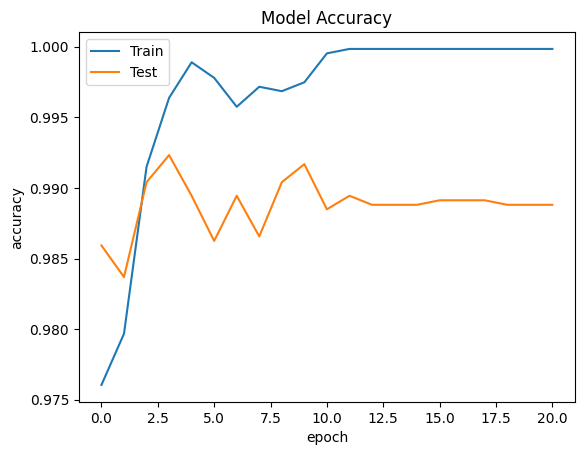

In [114]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Test'],loc = 'upper left')
plt.show()


#### Plot for the loss

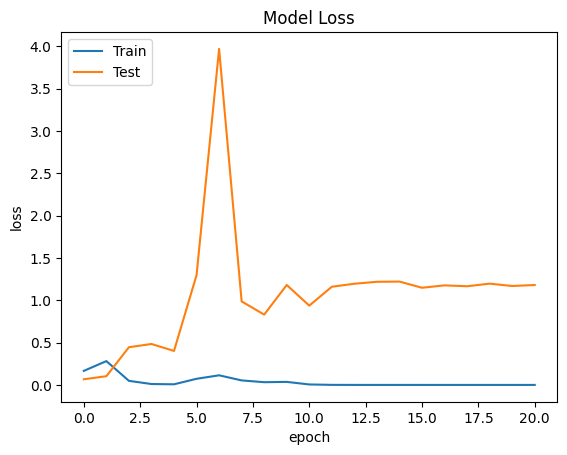

In [115]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Test'],loc = 'upper left')
plt.show()

#### Prdicting test result

In [134]:
y_pred = classifier.predict(x_test_final)
y_pred  = (y_pred >=0.5)
y_pred

99/99 [==============================] - 1s 7ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [117]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[3076,   14],
       [  17,   51]], dtype=int64)

In [118]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score

0.9901836605446485

In [129]:
import pickle
with open("ANN_model.pkl","wb") as f:
    pickle.dump(classifier,f)

In [127]:
!pip freeze > project_requirements.txt
